In [24]:
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [25]:
# Load dataset
url = 'sonar.all-data.csv'
dataset = read_csv(url, header=None)

In [26]:
print(dataset.shape)
set_option('display.max_rows', 500)
print(dataset.dtypes)

(208, 61)
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


In [27]:
set_option('display.width', 100)
print(dataset.head(20))

        0       1       2       3       4   ...      56      57      58      59  60
0   0.0200  0.0371  0.0428  0.0207  0.0954  ...  0.0180  0.0084  0.0090  0.0032   R
1   0.0453  0.0523  0.0843  0.0689  0.1183  ...  0.0140  0.0049  0.0052  0.0044   R
2   0.0262  0.0582  0.1099  0.1083  0.0974  ...  0.0316  0.0164  0.0095  0.0078   R
3   0.0100  0.0171  0.0623  0.0205  0.0205  ...  0.0050  0.0044  0.0040  0.0117   R
4   0.0762  0.0666  0.0481  0.0394  0.0590  ...  0.0072  0.0048  0.0107  0.0094   R
5   0.0286  0.0453  0.0277  0.0174  0.0384  ...  0.0057  0.0027  0.0051  0.0062   R
6   0.0317  0.0956  0.1321  0.1408  0.1674  ...  0.0092  0.0143  0.0036  0.0103   R
7   0.0519  0.0548  0.0842  0.0319  0.1158  ...  0.0085  0.0047  0.0048  0.0053   R
8   0.0223  0.0375  0.0484  0.0475  0.0647  ...  0.0065  0.0093  0.0059  0.0022   R
9   0.0164  0.0173  0.0347  0.0070  0.0187  ...  0.0032  0.0035  0.0056  0.0040   R
10  0.0039  0.0063  0.0152  0.0336  0.0310  ...  0.0042  0.0003  0.0053  0.0

In [28]:
print(dataset.groupby(60).size())

60
M    111
R     97
dtype: int64


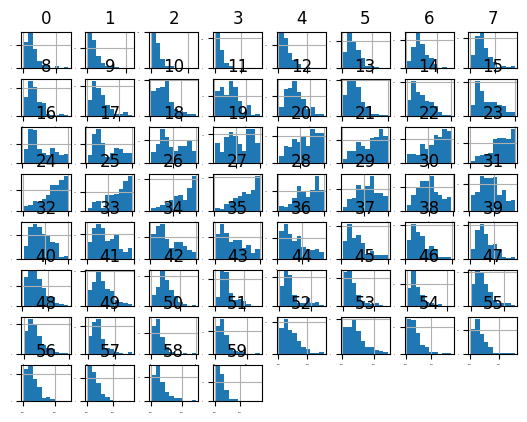

In [29]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

### Hãy hình dung mối tương quan giữa các thuộc tính.
- Màu đỏ xung quanh đường chéo cho thấy các thuộc tính nằm cạnh nhau thường có mối tương quan với nhau nhiều hơn.
- Các mảng màu xanh lam cũng cho thấy một số mối tương quan tiêu cực vừa phải khi các thuộc tính xa nhau hơn trong thứ tự.

### Trong phần này, chúng tôi sẽ nghiên cứu cách điều chỉnh các tham số cho hai thuật toán cho thấy có triển vọng từ việc kiểm tra ngẫu nhiên ở phần trước: KNN và SVM.

In [30]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)
num_folds = 10
seed = 7
scoring = 'accuracy'

In [31]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.836029 using {'n_neighbors': 1}
0.836029 (0.079487) with: {'n_neighbors': 1}
0.813603 (0.088021) with: {'n_neighbors': 3}
0.814338 (0.096870) with: {'n_neighbors': 5}
0.777574 (0.120387) with: {'n_neighbors': 7}
0.730147 (0.099376) with: {'n_neighbors': 9}
0.741544 (0.073970) with: {'n_neighbors': 11}
0.710662 (0.105829) with: {'n_neighbors': 13}
0.723162 (0.080983) with: {'n_neighbors': 15}
0.698897 (0.072669) with: {'n_neighbors': 17}
0.710662 (0.091337) with: {'n_neighbors': 19}
0.698897 (0.091195) with: {'n_neighbors': 21}


- Chúng ta có thể thấy rằng cấu hình tối ưu là K=1. Điều này rất thú vị vì thuật toán sẽ đưa ra dự đoán chỉ bằng cách sử dụng trường hợp tương tự nhất trong tập dữ liệu đào tạo.